In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    #print(coef,intercept,mi,ma)

    points=np.array([[((-coef[0][1]*mi - intercept)/coef[0][0]), mi],[((-coef[0][1]*ma - intercept)/coef[0][0]), ma]])
    #print(points)
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

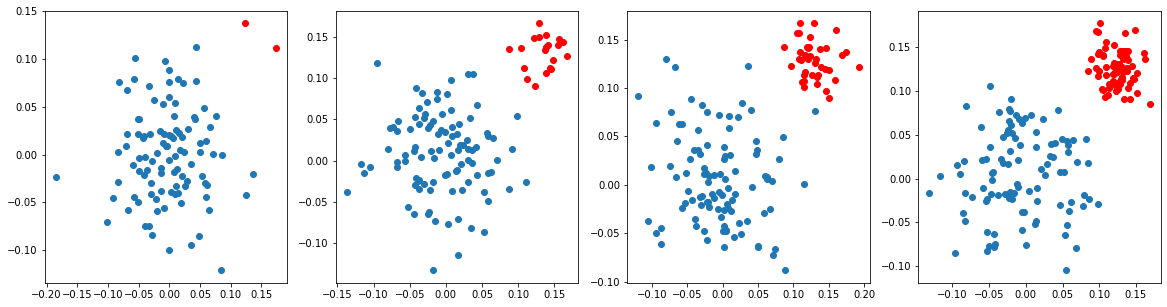

In [4]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

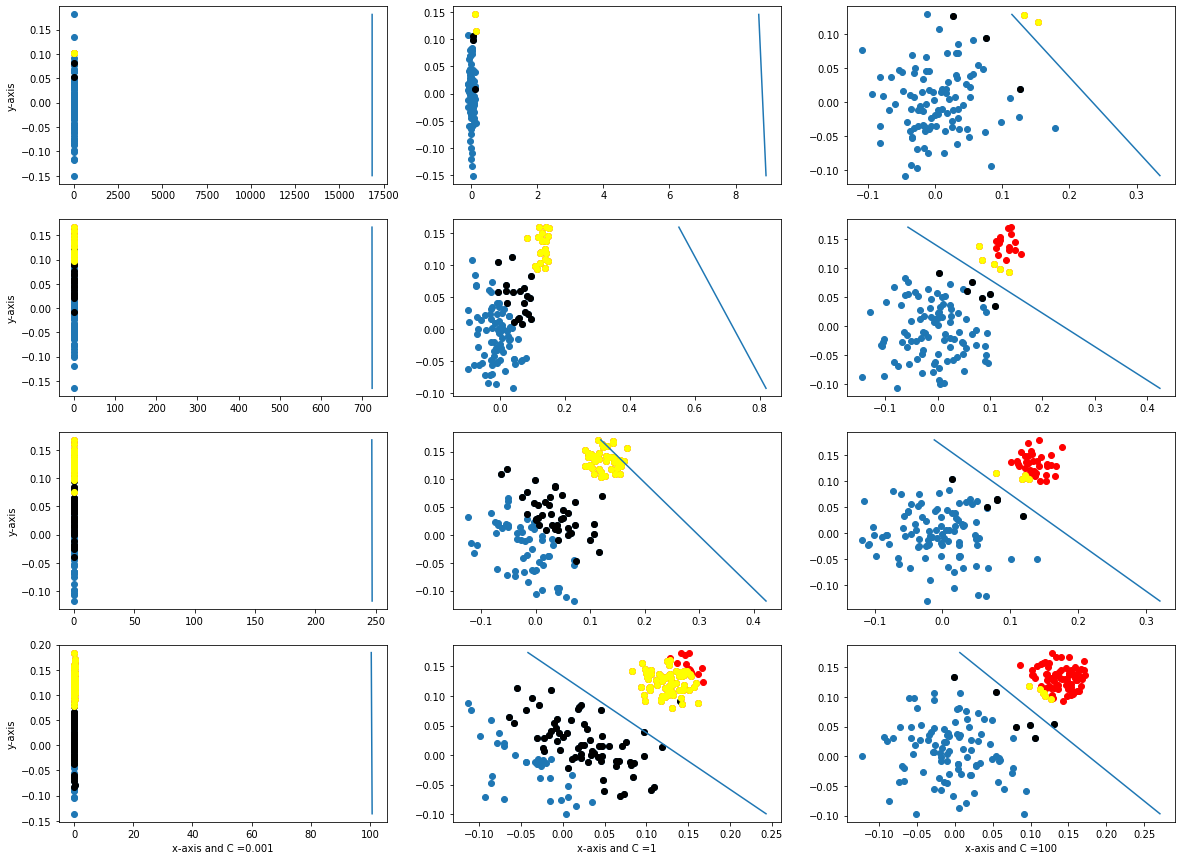

In [5]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
Reg_parameters=[0.001,1,100]

plt.figure(figsize=(20,15))
for j,i in enumerate(ratios):
  for k,l in enumerate(Reg_parameters):
    plt.subplot(len(ratios), len(Reg_parameters), len(Reg_parameters)*(j)+(k+1))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))

    clf = SVC(C=l,kernel='linear')
    clf.fit(X,y)

    w = clf.coef_
    b = clf.intercept_
    sv = clf.support_vectors_

    sv_blue = []
    sv_red = []
    for m in range(len(sv)):
      if sv[m,:] in X_p:
        sv_blue.append(sv[m])
      elif sv[m,:] in X_n:
        sv_red.append(sv[m])
    sv_blue = np.array(sv_blue)
    sv_red = np.array(sv_red)

    #print(sv_blue)
    #print(sv_red)
    #print('\n','\n')
    
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    plt.scatter(sv_blue[:,0],sv_blue[:,1],color='k')
    plt.scatter(sv_red[:,0],sv_red[:,1],color='yellow')
    draw_line(w,b,X[:,1].min(axis=0),X[:,1].max(axis=0))
    if j==3:
      plt.xlabel('x-axis and C ='+str(l))
    if k==0:
      plt.ylabel('y-axis')
plt.show()


In the above plot
1. yellow points represent the support vectors of negative(-ve) class. 
2. Black points represent the support vectors of positive (+ve) class.
3. Blue points represent the normal positive(+ve) points.
4. Red points represent the normal negative(-ve) points.
**Observations from the above plot**:
1. In the primal form of optimization problem of svm, as C increases the influence of margin-maximization reduces and loss term dominates. So the model tries to reduce the misclassifications as much as possible.
2. In the above plot for a particular dataset(D1 or D2 or D3 or D4),as C increases model tries to fit the best line(due to more importance for loss minimization) and the number of support vectors taken by the model reduces and there by reducing the space complexity and run time complexity of the model.
3. In the above plot by observing column wise plots for a particular C value(0.001 or 1 or 100) when imbalance in the data decreases, the model tries to fit the hyperplane at the best possible way and thereby reducing the loss.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

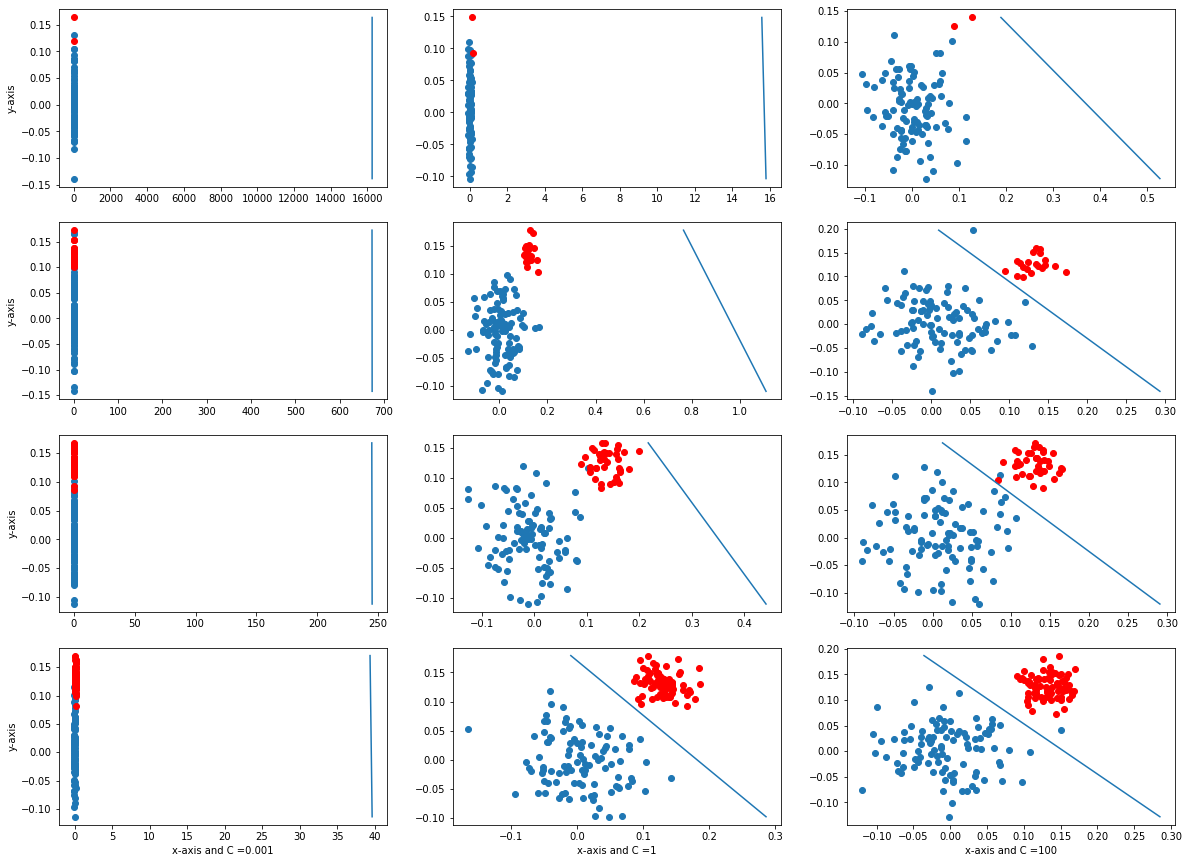

In [ ]:
#you can start writing code here.

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
lst=[0.001,1,100]

plt.figure(figsize=(20,15))
for j,i in enumerate(ratios):
  for k,l in enumerate(lst):
    plt.subplot(4, 3, 3*(j)+(k+1))
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))

    clf=LogisticRegression(penalty='l2',C=l)
    clf.fit(X,y)

    w = clf.coef_
    b = clf.intercept_
    #print(w,b)
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    draw_line(w,b,X[:,1].min(axis=0),X[:,1].max(axis=0))
    if j==3:
      plt.xlabel('x-axis and C ='+str(l))
    if k==0:
      plt.ylabel('y-axis')
plt.show()

In the above plt:
1. Blue points represent the normal positive(+ve) points.
3. Red points represent the normal negative(-ve) points.
**Observations from the above plots:**
1. In the optimization problem of logistic regression, $C=\frac{1}{\lambda}$which means C is inversely proportional to $\lambda$. Thus we can interpret C as below
  1. When C increases $\lambda$ decreases and Regularization term influence decreases and thereby model tries to reduce the loss as much as possible.
  2. When C decreases $\lambda$ increases and regularization term influence increases and loss term influence decreases and model tries to make more errors and reaching towards underfitting.
2. In the above plot, for a particular data(D1 or D2 or D3 or D4)as C increases hyperplane tries to move towards the data and making correct classification. 
3. In the plot for a particular C value(either 0.001 or 1 or 100) as imbalance in the data decreases, hyperplane moves towards the desired position of correct classification and thereby making as less errors as possible. This is because, Logistic Regression is severely effected by imbalance in the data.

**Differences between SVM and Logistic Regression observed from the plots:**
1. As observed in cell[3][2] for plots of both SVM and LR, SVM tried it's best to classify atleast some of negative points as correctly. But in LR hyperplane misclassified all negative points for imbalance data (70,30)%
2. From cell[1][3] we can observe that SVM classified 1 negative point as correctly but LR classified both negative points as incorrectly which conveys that LR is severely impacted by imbalance in the data but svm is impacted comparatively lesser.
3. Observing all cell[:][0](0th column cells) the hyperplane in svm is some what closer to the data than that of LR hyperplane.
4. As observed in cell[2][3] and cell[3][3] of both svm and LR, svm has no missclassifications where as LR has atleast one missclassification for the same data.  
**General Observations:**
1. LR is impacted more by imbalanced data where as SVM less impacted.
2. C value has good impact for SVM than LR as observed in cells[3][2] and cells [3][3].
